In [2]:
import numpy as np

In [3]:
# 데이터 저장 경로 설정
output_dir = "shap"

# 데이터 로드
X_train = np.load(f"{output_dir}/X_train.npy")
y_train = np.load(f"{output_dir}/y_train.npy")
X_test = np.load(f"{output_dir}/X_test.npy")
y_test = np.load(f"{output_dir}/y_test.npy")
F_train_x = np.load(f"{output_dir}/F_train_x.npy")
F_train_y = np.load(f"{output_dir}/F_train_y.npy")
F_test_x = np.load(f"{output_dir}/F_test_x.npy")
F_test_y = np.load(f"{output_dir}/F_test_y.npy")

print(f"Data successfully loaded! Shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"F_train_x: {F_train_x.shape}, F_train_y: {F_train_y.shape}")
print(f"F_test_x: {F_test_x.shape}, F_test_y: {F_test_y.shape}")


Data successfully loaded! Shapes:
X_train: (72002, 512, 1), y_train: (72002, 512, 1)
X_test: (13316, 512, 1), y_test: (13316, 512, 1)
F_train_x: (72002, 512, 1), F_train_y: (72002, 512, 1)
F_test_x: (13316, 512, 1), F_test_y: (13316, 512, 1)


In [4]:
import numpy as np
import tensorflow as tf
from deepFilter.dl_models import Transformer_COMBDAE
model = Transformer_COMBDAE()
# 3. 입력 데이터 준비
X_test = np.load("shap/X_test.npy")
F_test_x = np.load("shap/F_test_x.npy")
model.build(input_shape=[(None, 512, 1), (None, 512, 1)])  # 입력 크기 명시
try:
    model.load_weights("shap/Transformer_COMBDAE_weights.best.weights.h5")
    print("Model weights loaded successfully!")
except ValueError as e:
    print(f"Error loading weights: {e}")

2025-02-14 20:50:32.559718: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-14 20:50:32.566017: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739533832.573695 1812851 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739533832.575993 1812851 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-14 20:50:32.583998: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Error loading weights: A total of 32 objects could not be loaded. Example error message for object <EinsumDense name=key, built=True>:

Layer 'key' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 'bias']

List of objects that could not be loaded:
[<EinsumDense name=key, built=True>, <EinsumDense name=attention_output, built=True>, <EinsumDense name=query, built=True>, <EinsumDense name=value, built=True>, <EinsumDense name=key, built=True>, <EinsumDense name=attention_output, built=True>, <EinsumDense name=query, built=True>, <EinsumDense name=value, built=True>, <EinsumDense name=key, built=True>, <EinsumDense name=attention_output, built=True>, <EinsumDense name=query, built=True>, <EinsumDense name=value, built=True>, <EinsumDense name=key, built=True>, <EinsumDense name=attention_output, built=True>, <EinsumDense name=query, built=True>, <EinsumDense name=value, built=True>, <LayerNormalization name=layer_normalization_8, built=True>, <EinsumDens

I0000 00:00:1739533863.748974 1813019 service.cc:148] XLA service 0x7f52c40028f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739533863.748988 1813019 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
I0000 00:00:1739533863.748989 1813019 service.cc:156]   StreamExecutor device (1): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2025-02-14 20:51:03.776717: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1739533863.876348 1813019 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-14 20:51:04.340375: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_37', 72 bytes spill stores, 72 bytes spill loads

2025-02-14 20:51:04.377849: I external/local_xla/xla/stream_executor/

 55/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

I0000 00:00:1739533865.165592 1813019 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step


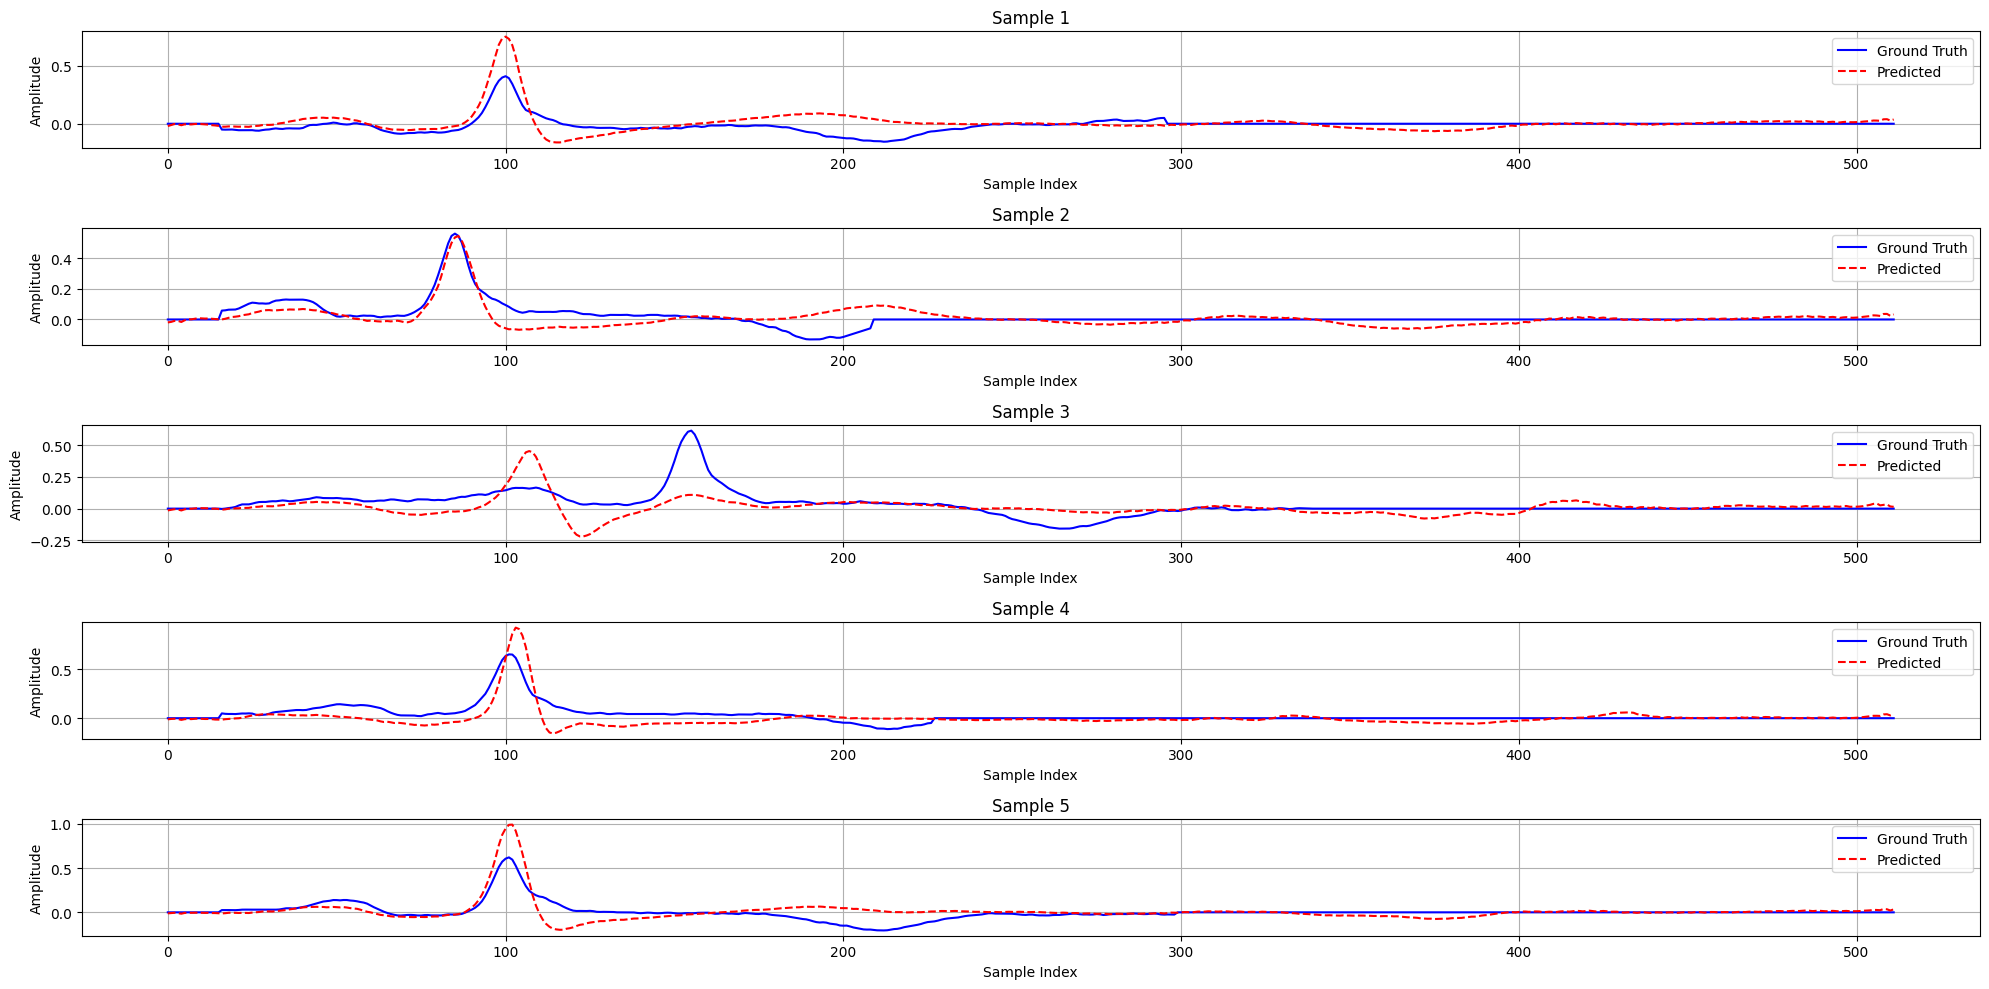

In [6]:
# 4. Inference 수행
y_pred = model.predict([X_test, F_test_x], batch_size=128, verbose=1)

# 5. 결과 저장
np.save("shap/y_pred.npy", y_pred)

import matplotlib.pyplot as plt
# 시각화할 샘플 수
num_samples = 5

plt.figure(figsize=(20, 10))
for i in range(num_samples):
    plt.subplot(num_samples, 1, i + 1)
    plt.plot(y_test[i], label="Ground Truth", color="blue")
    plt.plot(y_pred[i], label="Predicted", color="red", linestyle="--")
    plt.title(f"Sample {i+1}")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
import tensorflow as tf
import h5py

# 가중치 파일 경로
weights_path = "shap/Transformer_COMBDAE_weights.best.weights.h5"

# 가중치 파일 열기
with h5py.File(weights_path, 'r') as f:
    print("모든 레이어 이름 및 가중치 정보:")
    for layer_name in f.keys():
        print(f"\nLayer: {layer_name}")
        layer = f[layer_name]
        for weight_name in layer.keys():
            weight = layer[weight_name]
            print(f"  - Weight: {weight_name}")


모든 레이어 이름 및 가중치 정보:

Layer: layers
  - Weight: activation
  - Weight: activation_1
  - Weight: activation_2
  - Weight: activation_3
  - Weight: activation_4
  - Weight: activation_5
  - Weight: batch_normalization
  - Weight: batch_normalization_1
  - Weight: batch_normalization_2
  - Weight: batch_normalization_3
  - Weight: batch_normalization_4
  - Weight: batch_normalization_5
  - Weight: batch_normalization_6
  - Weight: batch_normalization_7
  - Weight: batch_normalization_8
  - Weight: concatenate
  - Weight: conv1d
  - Weight: conv1d_1
  - Weight: conv1d_10
  - Weight: conv1d_11
  - Weight: conv1d_12
  - Weight: conv1d_13
  - Weight: conv1d_14
  - Weight: conv1d_15
  - Weight: conv1d_16
  - Weight: conv1d_17
  - Weight: conv1d_18
  - Weight: conv1d_19
  - Weight: conv1d_2
  - Weight: conv1d_3
  - Weight: conv1d_4
  - Weight: conv1d_5
  - Weight: conv1d_6
  - Weight: conv1d_7
  - Weight: conv1d_8
  - Weight: conv1d_9
  - Weight: conv2d_transpose
  - Weight: conv2d_transpose_1
 

In [10]:
y_pred = np.load("shap/y_pred.npy")
y_pred.shape

(13316, 512, 1)

In [28]:
import wfdb
import _pickle as pickle
from datetime import datetime
import numpy as np

dl_experiments = ['DRNN','FCN-DAE', 'DeepFilter','AttentionSkipDAE','Transformer_DAE','Transformer_COMBDAE']
    # dl_experiments = ['Transformer_DAE','AttentionSkipDAE']
import wfdb
import _pickle as pickle
from datetime import datetime
import numpy as np

# Load Results Transformer_FDAE
with open('shap/test_results_'  + dl_experiments[5] + '.pkl', 'rb') as input:
    test_Transformer_COMBDAE = pickle.load(input)

# Transformer_COMBDAE
[X_test, y_test, y_pred] = test_Transformer_COMBDAE


In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.callbacks import ModelCheckpoint
# from deepFilter.dl_models import Transformer_COMBDAE
# import keras
# from keras import backend as K
# from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard
# from keras import losses
# from sklearn.model_selection import train_test_split
# import tensorflow_probability as tfp
# import tensorflow as tf 
# from datetime import datetime
# from deepFilter.dl_models import *
# import os
# import shap

# # 데이터 로드
# X_train = np.load(f"{output_dir}/X_train.npy")
# y_train = np.load(f"{output_dir}/y_train.npy")
# X_test = np.load(f"{output_dir}/X_test.npy")
# y_test = np.load(f"{output_dir}/y_test.npy")
# F_train_x = np.load(f"{output_dir}/F_train_x.npy")
# F_train_y = np.load(f"{output_dir}/F_train_y.npy")
# F_test_x = np.load(f"{output_dir}/F_test_x.npy")
# F_test_y = np.load(f"{output_dir}/F_test_y.npy")
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, shuffle=True, random_state=1)
# F_train_x, F_val_x, F_train_y, F_val_y = train_test_split(F_train_x, F_train_y, test_size=0.3, shuffle=True, random_state=1)
# # 모델 초기화
# model = Transformer_COMBDAE()
# epochs = int(1e5)  # 100000
# batch_size = 128  #128
# lr = 1e-3
# # 델 컴파일
# model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# # 체크포인트 설정
# checkpoint = ModelCheckpoint(
#     filepath=f"{output_dir}/Transformer_COMBDAE_weights.best.weights.h5",
#     monitor="val_loss",
#     verbose=1,
#     save_best_only=True,
#     mode="min",
#     save_weights_only=True
# )
# reduce_lr = ReduceLROnPlateau(monitor="val_loss",
#                             factor=0.5,           # 학습률 감소 비율은 그대로 유지
#                             min_delta=0.005,      # min_delta를 0.05에서 0.001로 줄여 작은 개선도 감지
#                             mode='min',           # val_loss 최소화를 목표로 함
#                             patience=10,          # patience를 2에서 10으로 늘려 학습률 감소 시점을 늦춤
#                             verbose=1)
# early_stop = EarlyStopping(monitor="val_loss",  
#                         min_delta=0.001,       # 개선 판단을 위한 최소 변화량
#                         mode='min',             # val_loss 최소화를 목표로 함
#                         patience=30,            # patience를 50에서 20으로 줄여 더 빠른 조기 종료
#                         verbose=1)
# # 모델 학습
# history = model.fit(x=[X_train, F_train_x], y=y_train,
#                 validation_data=([X_val, F_val_x], y_val),
#                 batch_size=batch_size,
#                 epochs=epochs,
#                 verbose=1,
#                 callbacks=[early_stop,
#                             reduce_lr,
#                             checkpoint])


# # 가중치 로드
# model.load_weights(f"{output_dir}/Transformer_COMBDAE_weights.best.weights.h5")

# # Inference 수행
# y_pred = model.predict([X_test, F_test_x], batch_size=batch_size, verbose=1)